## Image classification with Neural Networks: 
### In this Model, I have 2 different categories of photos. Dogs and Cats which is around 12500 photos for each category. But for simplification and time saving I just used 500 photos per category. It may cause overfitting in the end but using more photos can solve this problem. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

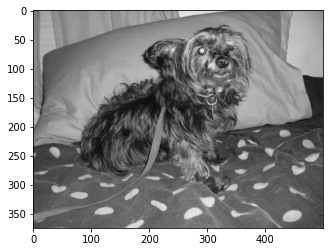

In [2]:

address = "E:\LEARN\Python\PROJECTS\dogs_cats\PetImages"
CATEGORIES = ["Dogs" , "Cats"]

for category in CATEGORIES:
    path = os.path.join(address , category) #joining the path of two categories
    for img in os.listdir(path): # for any image in each category we have (cat & dog)
        img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)  #convert each image to an array
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

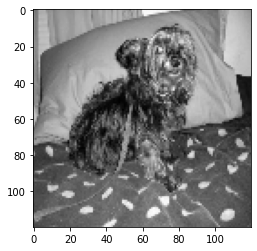

In [3]:
#As we have images with different sizes so I decided to resize them to 120 * 120 which is clear and small enough

img_size = 120
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [4]:
img_array.shape

(375, 500)

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(address , category) #joining the path of two categories
        class_num = CATEGORIES.index(category) #returns the index of each category hich is 0 or 1 because we have 2 categories
        for img in os.listdir(path): # for any image in each category we have (cat & dog)
            try: # if there is a reading issue with an image I want to pass it
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)  #convert each image to an array
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as ex:
                pass
            
            
create_training_data()

In [6]:
len(training_data)

999

In [7]:
len(training_data[1][0])

120

In [8]:
training_data[1]

[array([[167, 123, 132, ...,  93, 114,  95],
        [154,  98, 108, ...,  72,  86,  84],
        [151,  78,  65, ...,  81,  85,  64],
        ...,
        [251, 244, 245, ..., 230, 232, 228],
        [251, 239, 237, ..., 234, 234, 230],
        [252, 245, 245, ..., 240, 242, 241]], dtype=uint8),
 0]

In [9]:
import random

random.shuffle(training_data)

In [10]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)
print(X[0])

[[[148]
  [141]
  [157]
  ...
  [ 33]
  [ 34]
  [ 33]]

 [[ 95]
  [ 82]
  [ 37]
  ...
  [ 31]
  [ 30]
  [ 30]]

 [[145]
  [150]
  [111]
  ...
  [ 31]
  [ 30]
  [ 30]]

 ...

 [[ 78]
  [ 98]
  [ 74]
  ...
  [ 15]
  [ 14]
  [ 14]]

 [[ 15]
  [ 37]
  [ 51]
  ...
  [ 14]
  [ 15]
  [ 15]]

 [[ 72]
  [ 83]
  [ 98]
  ...
  [ 14]
  [ 14]
  [ 15]]]


## Saving the inputs as pickle file

In [11]:
import pickle
with open('picke_inp_x','wb') as file:
    pickle.dump(X, file)
    
with open('picke_inp_y','wb') as file:
    pickle.dump(y, file)

## Loading the pickle inputs 

In [12]:
import pickle
with open('picke_inp_x','rb') as file1:
    X = pickle.load(file1)
    
with open('picke_inp_y','rb') as file2:
    y = pickle.load(file2)    

## Standardazing the input

In [13]:
print(X[1].min())
print(X[1].max())

0
255


#### As the data is in the form of photos the detailes are in pixels. So we have photos with 0-254 or 255 different values for each photo. for Standardazing the values we should perform like this: (pixel-0)/255 which is pixel /255

In [14]:
X = X /255.0

## Spliting test and train data

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [16]:
# Converting the array to tensor
import numpy as np
def my_func(arg):
  arg_ = tf.convert_to_tensor(arg, dtype=tf.float32)
  return arg_

XX =my_func(X)
yy = my_func(y)

In [17]:
type(XX)

tensorflow.python.framework.ops.EagerTensor

In [23]:
XX.shape

TensorShape([999, 120, 120, 1])

## Model

In [ ]:
GPU_options = tf.GPUOptions('per_process_gpu_memory_fraction' = 0.5)
pro = tf.Session(config = tf.ConfigProto(gpu_options = GPU_options))

In [18]:
model = Sequential()

model.add(Conv2D(120, (3, 3), input_shape=XX.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(120, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 5
result = model.fit(XX, yy, batch_size=32, validation_split = 0.2,epochs= epochs)

Epoch 1/10
25/25 [==============================] - 309s 12s/step - loss: 1.9647 - accuracy: 0.5289 - val_loss: 0.7100 - val_accuracy: 0.5000
Epoch 2/10
25/25 [==============================] - 335s 13s/step - loss: 0.6848 - accuracy: 0.5648 - val_loss: 0.6797 - val_accuracy: 0.5850
Epoch 3/10
25/25 [==============================] - 341s 14s/step - loss: 0.6399 - accuracy: 0.6748 - val_loss: 0.6729 - val_accuracy: 0.6100
Epoch 4/10
25/25 [==============================] - 344s 14s/step - loss: 0.5777 - accuracy: 0.6975 - val_loss: 0.6751 - val_accuracy: 0.6300
Epoch 5/10
25/25 [==============================] - 349s 14s/step - loss: 0.4998 - accuracy: 0.7535 - val_loss: 0.7130 - val_accuracy: 0.6400
Epoch 6/10
25/25 [==============================] - 346s 14s/step - loss: 0.4422 - accuracy: 0.7928 - val_loss: 0.7458 - val_accuracy: 0.5850
Epoch 7/10
25/25 [==============================] - 354s 14s/step - loss: 0.3633 - accuracy: 0.8561 - val_loss: 0.8136 - val_accuracy: 0.5950
Epoch 

## Visualize training results

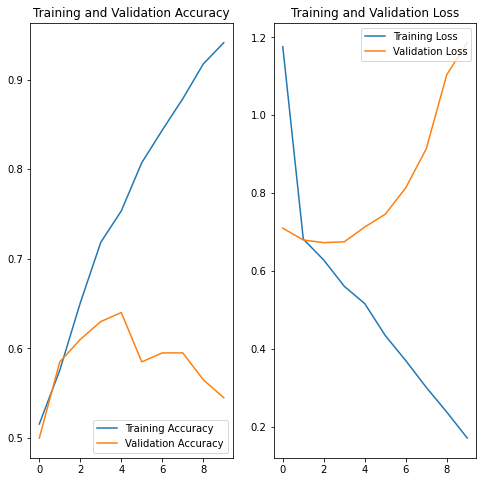

In [21]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 65% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable and a sign of overfitting.
### This could be a result of having a small number of training data so we can use the whole dataset (30000) inputs instead of 1000 photos. 